[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juanhuguet/intro_to_nlp/blob/main/notebooks/01-basic-ml-classification-tabular-data.ipynb)

# A gentle reminder on machine learning

👉🏼 We can understand a ML algorithm as **an algorithm that changes its internal state** to find the best **mapping** between an output variable and its input features.

<img src="https://file.notion.so/f/f/003df94c-172d-46b4-9c84-4a2f90ef0ed1/6a100a7c-43b1-48f6-86ba-3e80f30a1eb7/Screenshot_2023-05-02_at_20.33.28.png?id=528fb93a-95de-4ede-b053-532280f0aeff&table=block&spaceId=003df94c-172d-46b4-9c84-4a2f90ef0ed1&expirationTimestamp=1705615200000&signature=3S_88DvpU2Hc6tSlN0KBYtpF-gsuPD7490F_mLXfMn0&downloadName=Screenshot+2023-05-02+at+20.33.28.png" width="400" height="200">

Just for demonstration purposes, we are going to train a small classifier over tabular data.

# Load the needed libraries

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

[yellowbrick](https://www.scikit-yb.org/en/latest/) is a sklearn wrapper that gives visualization super powers to your machine learning projects.

**Very useful for prototyping and the experimentation stage**


Import a sample dataset...

In [2]:
from yellowbrick.datasets import load_credit

Import the metrics, as we are dealing with a binary classification we will evaluate it using the ROC-AUC.

In [3]:
from yellowbrick.classifier.rocauc import roc_auc

# Load data

In [4]:
X, y = load_credit()

In [5]:
X.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [7]:
y.unique()

array([1, 0])

## Create the train and test data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [9]:
model = LogisticRegression(multi_class="auto", solver="liblinear")

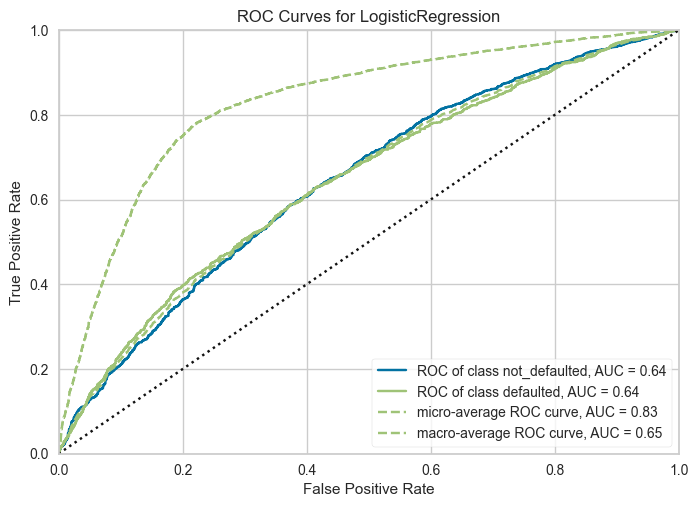

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['not_defaulted', 'defaulted'],
       estimator=LogisticRegression(solver='liblinear'))

In [10]:
roc_auc(model,
        X_train,
        y_train,
        X_test=X_test,
        y_test=y_test,
        classes=['not_defaulted', 'defaulted']
       )